# Inferences 

## Import Libraries

In [1]:
from MSCOCO import MSCOCO
from utils import *
from torch.utils import data
import random
from PIL import Image

## Load Dataset Interface and DataLoader

In [2]:
coco_classes, coco_object_categories = load_coco_classes('./mscoco_labels.txt')

In [3]:
root_path = '../../../Datasets/MS COCO'
json_annotations = './json files/train_annotation.json'
target_classes = ['__bgr__', 'person', 'car']

test_interface_params = {
    'root_path': root_path,
    'list_of_classes': coco_classes,
    'target_classes': target_classes,
    'stage': 'test',
}

test_interface = MSCOCO(**test_interface_params)

test_dataloader_args = {'batch_size':1, 'shuffle':True}
test_dataloader = data.DataLoader(test_interface, **test_dataloader_args)

print(f"Test Loader Length: {len(test_dataloader)}")

Test Loader Length: 2869


In [4]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

print(f'Available device: {device}')

Available device: cuda


## Load the model

In [5]:
faster_rcnn_params = {
   "backbone":"resnet50",
    "num_classes": 3,
    "pretrained": True,
    "pretrained_backbone": True,
    "model_path": None 
}
faster_rcnn_50 = load_faster_rcnn(**faster_rcnn_params)

checkpoint_path = '../models/model_backbone50'
epoch_50, model_50, training_loss_50 = load_model(faster_rcnn_50, checkpoint_path)

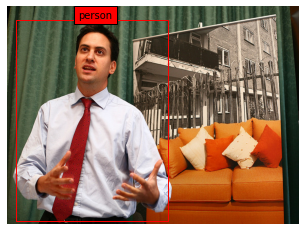

Wall time: 2.14 s


In [13]:
%%time
random_idx = random.randint(0, len(test_interface))
#print(test_interface.imgs[random_idx])
image = Image.open(os.path.join(root_path, 'val2017', test_interface.imgs[random_idx]))
#image = Image.open('./wado.jpeg')
predict(model_50, image, target_classes, device)